In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("retail_store_inventory.csv")
data = df.copy()
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [3]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [4]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


In [5]:
df.describe(include = "object")

,Date,Store ID,Product ID,Category,Region,Weather Condition,Seasonality
count,73100,73100,73100,73100,73100,73100,73100
unique,731,5,20,5,4,4,4
top,2024-01-01,S001,P0001,Furniture,East,Sunny,Spring
freq,100,14620,3655,14699,18349,18290,18317


In [6]:
df.isna().sum()

,0
Date,0
Store ID,0
Product ID,0
Category,0
Region,0
Inventory Level,0
Units Sold,0
Units Ordered,0
Demand Forecast,0
Price,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.shape

(73100, 15)

In [9]:
RegionCounts = df['Region'].value_counts().reset_index()
RegionCounts

,Region,count
0,East,18349
1,South,18297
2,North,18228
3,West,18226


In [10]:
CategoryCounts = df["Category"].value_counts().reset_index()
fig = px.bar(CategoryCounts,
             x='Category',
             y='count',
             title='<b>Distribution of Category by counts<b>',
             text_auto=True,
             width=1000,
             )
fig.show()

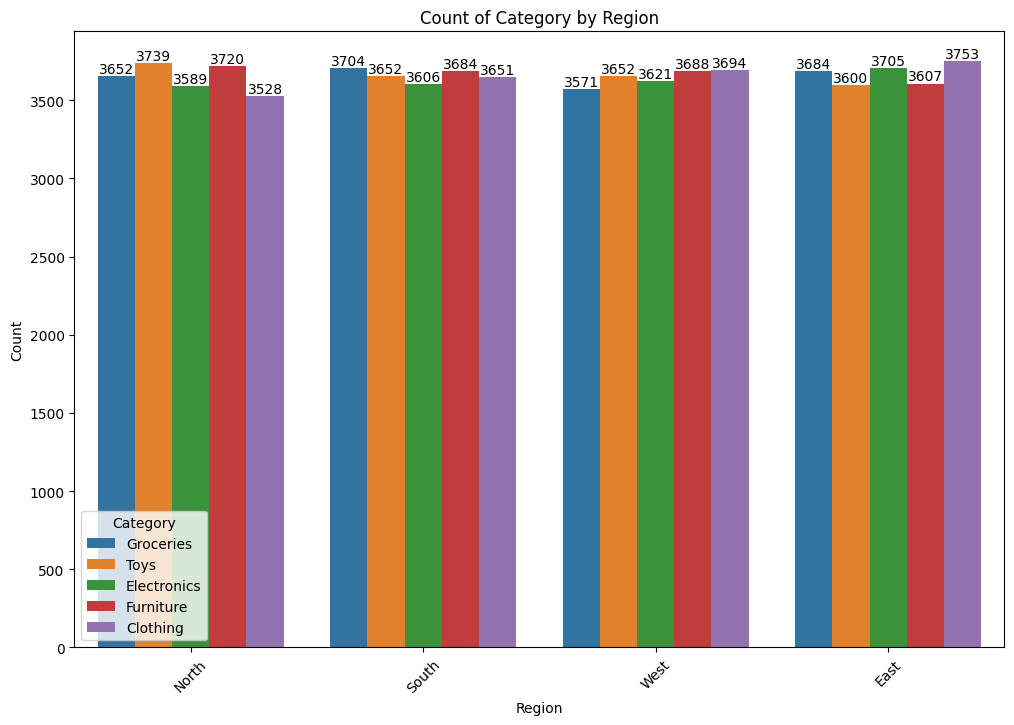

In [11]:
# Count of Category by Region
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='Region', hue='Category')

for s in ax.containers:
    ax.bar_label(s, fmt='%.0f')

plt.title('Count of Category by Region')
plt.ylabel('Count')
plt.xlabel('Region')
plt.legend(title='Category')
plt.xticks(rotation=45)

plt.show()

In [12]:
WeatherCounts = df["Weather Condition"].value_counts().reset_index()
fig = px.bar(WeatherCounts,
             x='Weather Condition',
             y='count',
             title='<b>Distribution of Weather by counts<b>',
             text_auto=True,
             width=1000,
             )
fig.show()

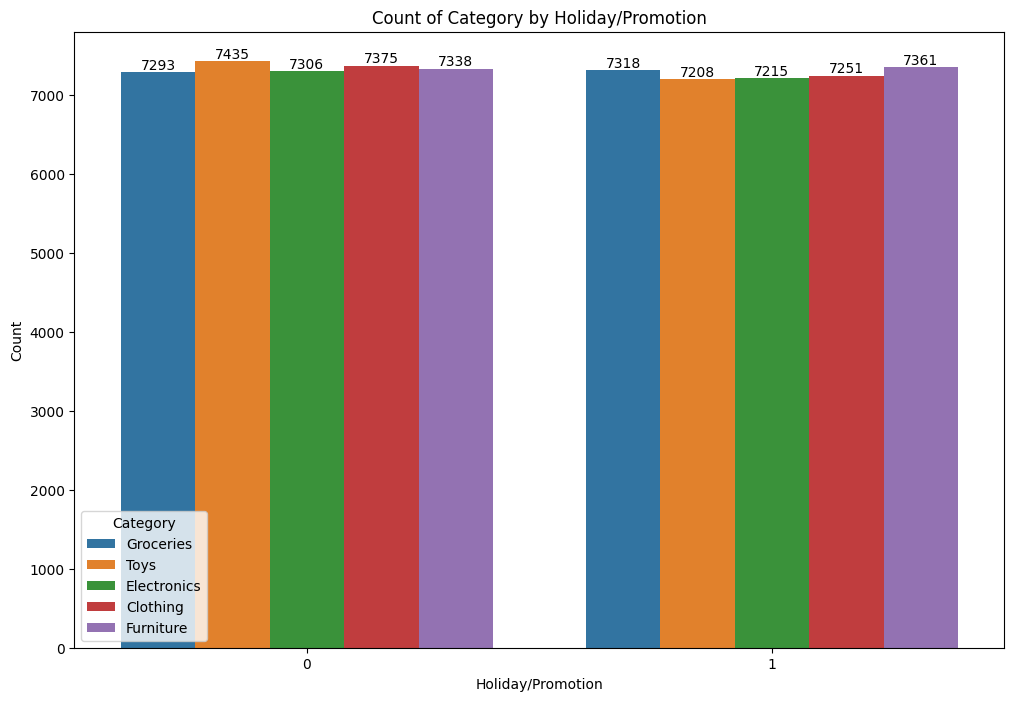

In [13]:
# Count of Category by Holiday/Promotion
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='Holiday/Promotion', hue='Category')

for s in ax.containers:
    ax.bar_label(s, fmt='%.0f')

plt.title('Count of Category by Holiday/Promotion')
plt.ylabel('Count')
plt.xlabel('Holiday/Promotion')
plt.legend(title='Category')

plt.show()

In [14]:
DiscountCounts = df["Discount"].value_counts().reset_index()
fig = px.bar(DiscountCounts,
             x='Discount',
             y='count',
             title='<b>Distribution of Discount by counts<b>',
             text_auto=True,
             width=1000,
             )
fig.show()

In [15]:
SeasonalityCounts = df["Seasonality"].value_counts().reset_index()
fig = px.bar(SeasonalityCounts,
             x='Seasonality',
             y='count',
             title='<b>Distribution of Seasonality by counts<b>',
             text_auto=True,
             width=1000,
             )
fig.show()

In [16]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [17]:
df.drop(columns=['Date', 'Store ID', 'Product ID', 'Demand Forecast'], axis=1, inplace=True)

In [18]:
x=df.drop(columns=['Price'])
y=df['Price']

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
x['Category'] = label_encoder.fit_transform(x['Category'])
x['Region'] = label_encoder.fit_transform(x['Region'])
x['Weather Condition'] = label_encoder.fit_transform(x['Weather Condition'])
x['Seasonality'] = label_encoder.fit_transform(x['Seasonality'])

In [20]:
df.head(15)

,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,Groceries,North,231,127,55,33.50,20,Rainy,0,29.69,Autumn
1,Toys,South,204,150,66,63.01,20,Sunny,0,66.16,Autumn
2,Toys,West,102,65,51,27.99,10,Sunny,1,31.32,Summer
3,Toys,North,469,61,164,32.72,10,Cloudy,1,34.74,Autumn
4,Electronics,East,166,14,135,73.64,0,Sunny,0,68.95,Summer
5,Groceries,South,138,128,102,76.83,10,Sunny,1,79.35,Winter
6,Furniture,East,359,97,167,34.16,10,Rainy,1,36.55,Winter
7,Clothing,North,380,312,54,97.99,5,Cloudy,0,100.09,Spring
8,Electronics,West,183,175,135,20.74,10,Cloudy,0,17.66,Autumn
9,Toys,South,108,28,196,59.99,0,Rainy,1,61.21,Winter


In [21]:
x.head(15)

,Category,Region,Inventory Level,Units Sold,Units Ordered,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,3,1,231,127,55,20,1,0,29.69,0
1,4,2,204,150,66,20,3,0,66.16,0
2,4,3,102,65,51,10,3,1,31.32,2
3,4,1,469,61,164,10,0,1,34.74,0
4,1,0,166,14,135,0,3,0,68.95,2
5,3,2,138,128,102,10,3,1,79.35,3
6,2,0,359,97,167,10,1,1,36.55,3
7,0,1,380,312,54,5,0,0,100.09,1
8,1,3,183,175,135,10,0,0,17.66,0
9,4,2,108,28,196,0,1,1,61.21,3


In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.70588851, -0.44525719, -0.33451587, ..., -0.99462457,
        -0.97193139, -1.34431734],
       [ 1.41297645,  0.44892689, -0.54229028, ..., -0.99462457,
         0.42051951, -1.34431734],
       [ 1.41297645,  1.34311098, -1.32721586, ...,  1.00540448,
        -0.90969682,  0.4459506 ],
       ...,
       [-1.41537533,  1.34311098,  0.02716553, ..., -0.99462457,
        -1.68896534,  1.34108457],
       [ 1.41297645, -1.33944127,  0.76591902, ..., -0.99462457,
         0.02496724, -0.44918337],
       [ 0.70588851, -1.33944127, -1.21178563, ...,  1.00540448,
         0.93061394, -0.44918337]])

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import time

RF = RandomForestRegressor()
start_train = time.time()
RF.fit(x_train, y_train)
end_train = time.time()

def evaluate_model(model, x_train, y_train, x_test, y_test):
    from math import sqrt

    start_pred = time.time()
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    end_pred = time.time()

    print("=== Train Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_train, y_pred_train))
    print("MSE:", mean_squared_error(y_train, y_pred_train))
    print("RMSE:", sqrt(mean_squared_error(y_train, y_pred_train)))
    print("R2 Score:", r2_score(y_train, y_pred_train))

    print("\n=== Test Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("MSE:", mean_squared_error(y_test, y_pred_test))
    print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_test)))
    print("R2 Score:", r2_score(y_test, y_pred_test))

    print("\n⏱️ Training time:", f"{end_train - start_train:.4f} seconds")
    print("⏱️ Prediction time:", f"{end_pred - start_pred:.4f} seconds")

evaluate_model(RF, x_train, y_train, x_test, y_test)

=== Train Set Evaluation ===
MAE: 0.907428856019152
MSE: 1.1628547341783515
RMSE: 1.0783574241309564
R2 Score: 0.998279327882826

=== Test Set Evaluation ===
MAE: 2.467858878248974
MSE: 8.413593047662106
RMSE: 2.900619424823275
R2 Score: 0.9876684217623553

⏱️ Training time: 47.1047 seconds
⏱️ Prediction time: 2.7673 seconds


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import time

lr = LinearRegression()
start_train = time.time()
lr.fit(x_train, y_train)
end_train = time.time()

def evaluate_model(model, x_train, y_train, x_test, y_test):
    from math import sqrt

    start_pred = time.time()
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    end_pred = time.time()

    print("=== Train Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_train, y_pred_train))
    print("MSE:", mean_squared_error(y_train, y_pred_train))
    print("RMSE:", sqrt(mean_squared_error(y_train, y_pred_train)))
    print("R2 Score:", r2_score(y_train, y_pred_train))

    print("\n=== Test Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("MSE:", mean_squared_error(y_test, y_pred_test))
    print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_test)))
    print("R2 Score:", r2_score(y_test, y_pred_test))

    print("\n⏱️ Training time:", f"{end_train - start_train:.4f} seconds")
    print("⏱️ Prediction time:", f"{end_pred - start_pred:.4f} seconds")

evaluate_model(lr, x_train, y_train, x_test, y_test)

=== Train Set Evaluation ===
MAE: 2.477791275889791
MSE: 8.212721949148005
RMSE: 2.865784700417672
R2 Score: 0.9878476638150455

=== Test Set Evaluation ===
MAE: 2.5032790879127047
MSE: 8.326874391041676
RMSE: 2.8856324074700983
R2 Score: 0.987795522977344

⏱️ Training time: 0.0291 seconds
⏱️ Prediction time: 0.0198 seconds


In [26]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

svr = SVR()
start_train = time.time()
svr.fit(x_train, y_train)
end_train = time.time()

def evaluate_model(model, x_train, y_train, x_test, y_test):
    from math import sqrt

    start_pred = time.time()
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    end_pred = time.time()

    print("=== Train Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_train, y_pred_train))
    print("MSE:", mean_squared_error(y_train, y_pred_train))
    print("RMSE:", sqrt(mean_squared_error(y_train, y_pred_train)))
    print("R2 Score:", r2_score(y_train, y_pred_train))

    print("\n=== Test Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("MSE:", mean_squared_error(y_test, y_pred_test))
    print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_test)))
    print("R2 Score:", r2_score(y_test, y_pred_test))

    print("\n⏱️ Training time:", f"{end_train - start_train:.4f} seconds")
    print("⏱️ Prediction time:", f"{end_pred - start_pred:.4f} seconds")

evaluate_model(svr, x_train, y_train, x_test, y_test)

=== Train Set Evaluation ===
MAE: 2.5928282529950555
MSE: 9.439525871624284
RMSE: 3.072381140357473
R2 Score: 0.9860323663057344

=== Test Set Evaluation ===
MAE: 2.6197460740293432
MSE: 9.635462374605549
RMSE: 3.1041041178745195
R2 Score: 0.9858775605790266

⏱️ Training time: 189.5399 seconds
⏱️ Prediction time: 252.2042 seconds


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import time
from math import sqrt

# 1. Inisialisasi dan latih model
lr = LinearRegression()
start_train = time.time()
lr.fit(x_train, y_train)
end_train = time.time()

# 2. Fungsi evaluasi model
def evaluate_model(model, x_train, y_train, x_test, y_test):
    start_pred = time.time()
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    end_pred = time.time()

    print("=== Train Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_train, y_pred_train))
    print("MSE:", mean_squared_error(y_train, y_pred_train))
    print("RMSE:", sqrt(mean_squared_error(y_train, y_pred_train)))
    print("R2 Score:", r2_score(y_train, y_pred_train))

    print("\n=== Test Set Evaluation ===")
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("MSE:", mean_squared_error(y_test, y_pred_test))
    print("RMSE:", sqrt(mean_squared_error(y_test, y_pred_test)))
    print("R2 Score:", r2_score(y_test, y_pred_test))

    print("\n⏱️ Training time:", f"{end_train - start_train:.4f} seconds")
    print("⏱️ Prediction time:", f"{end_pred - start_pred:.4f} seconds")

# 3. Evaluasi model
evaluate_model(lr, x_train, y_train, x_test, y_test)

# 4. Tampilkan koefisien (feature importance)
feature_names = x_train.columns  # Pastikan x_train adalah DataFrame
coefficients = lr.coef_

# Buat DataFrame untuk visualisasi koefisien
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Importance': abs(coefficients)
})

# Urutkan berdasarkan nilai absolut tertinggi
coef_df = coef_df.sort_values(by='Absolute Importance', ascending=False)

print("\n=== Feature Importance Berdasarkan Koefisien Linear Regression ===")
print(coef_df)


=== Train Set Evaluation ===
MAE: 2.477791275889791
MSE: 8.212721949148005
RMSE: 2.865784700417672
R2 Score: 0.9878476638150455

=== Test Set Evaluation ===
MAE: 2.5032790879127047
MSE: 8.326874391041676
RMSE: 2.8856324074700983
R2 Score: 0.987795522977344

⏱️ Training time: 0.0161 seconds
⏱️ Prediction time: 0.0117 seconds

=== Feature Importance Berdasarkan Koefisien Linear Regression ===
              Feature  Coefficient  Absolute Importance
8  Competitor Pricing     0.987377             0.987377
7   Holiday/Promotion     0.031109             0.031109
6   Weather Condition    -0.010696             0.010696
0            Category     0.005481             0.005481
9         Seasonality     0.002316             0.002316
5            Discount    -0.001718             0.001718
1              Region     0.000685             0.000685
4       Units Ordered    -0.000302             0.000302
2     Inventory Level     0.000056             0.000056
3          Units Sold     0.000016            

In [29]:
import joblib

joblib.dump(lr, "Price_Predict_Linear")

['Price_Predict_Linear']